In [45]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

Next, let's define the x and y variables: 

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Now, let's check the eigenvalues: 

And the eigenvectors: 

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

Now, calculate the explained variance and the Cumulative explained variance

Now, conduct the PCA using scikit learn

# Case #2: Airport Delays

In [3]:
airport = pd.read_csv('../assets/datasets/Airport_operations.csv')

First, let's define the x and y variables: Airport is going to be our "x" variable

In [76]:
X = airport.drop(['airport','year', 'percent on-time gate departures', 'percent on-time airport departures', 
                  'percent on-time gate arrivals'], axis=1)
y = airport['airport']

In [77]:
X

,departures for metric computation,arrivals for metric computation,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,53971,53818,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,51829,51877,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,49682,51199,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,53255,53611,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,49589,49512,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48
5,42550,42704,9.24,9.88,1.89,10.45,1.74,0.92,1.98,9.27
6,42302,42169,10.25,9.95,2.05,11.58,1.66,0.95,1.90,10.23
7,42283,42297,10.81,10.50,2.51,12.57,1.58,0.84,1.87,10.63
8,39105,39107,10.55,10.27,2.32,12.11,1.41,0.98,1.80,9.73
9,35277,34989,12.56,10.77,2.64,14.28,1.60,0.92,2.35,12.76


Then, standardize the x variable for analysis

In [78]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_X = ss.fit_transform(X)

print X.shape
scaled_X.shape

(841, 10)


(841, 10)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [79]:
covmat = np.cov(scaled_X.T)
eigenvalues, eigenvectors = np.linalg.eig(covmat)

Then, check your eigenvalues and eigenvectors:

In [80]:
print eigenvalues

[  5.01055150e+00   3.00090062e+00   7.53015652e-01   4.91619191e-01
   4.40591914e-01   1.66908119e-01   7.83319234e-02   6.88071606e-02
   1.71153110e-04   1.00752388e-03]


In [81]:
print eigenvectors

[[  3.32402401e-01  -3.15959434e-01   3.69436629e-01  -2.40268573e-01
   -8.46227848e-02  -2.78113047e-01   8.71760962e-02  -3.53226205e-02
   -7.08578290e-01  -5.23783538e-03]
 [  3.31785278e-01  -3.16291221e-01   3.71059561e-01  -2.42419149e-01
   -8.17008992e-02  -2.78360482e-01   9.88508326e-02  -4.11597817e-02
    7.05536004e-01   4.45964416e-03]
 [  1.87896438e-01   4.86586097e-01   3.39376349e-01  -7.05991799e-02
    1.71325074e-01   2.86193428e-02  -1.66930675e-01   3.60180707e-01
    6.65924906e-03  -6.48040634e-01]
 [  3.85145538e-01  -1.38574626e-01  -3.34444519e-01   2.17163212e-01
    2.92251238e-01  -3.23571432e-01  -6.90599453e-01  -7.96862777e-02
    5.52437297e-03   5.45028849e-03]
 [  3.67946443e-01  -1.73259723e-01  -4.03083281e-01   2.24966849e-01
    3.47009042e-01   6.08658953e-03   6.39953919e-01   6.59329628e-02
   -2.77790174e-03  -2.95232208e-01]
 [  3.20962602e-01   3.72101284e-01   1.45625947e-01   1.90025025e-02
    3.10407018e-01   3.35804821e-02   1.18892

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [82]:
eigenpairs = zip(eigenvalues, eigenvectors)

Next, Calculate the explained variance

In [83]:
eig_vals = sorted(eigenvalues,
                 reverse=True)

In [84]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [85]:
print cum_var_exp

[  50.04593654   80.01926023   87.54046294   92.4508092    96.85148943
   98.51858598   99.3009738    99.98822725   99.9982905   100.        ]


Finally, conduct the PCA - use the results about to guide your selection of "n" componants

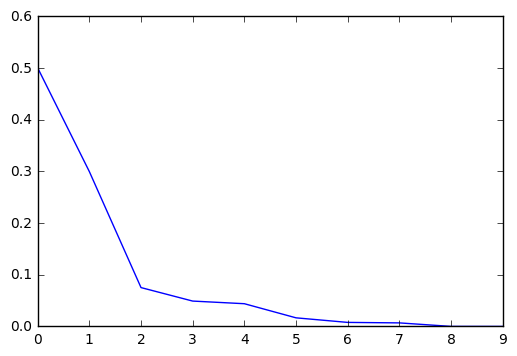

In [86]:
plt.plot(eig_vals/tot)

In [87]:
airports_pca = PCA(n_components=2)
Y = airports_pca.fit_transform(X)

In [90]:
Y.shape

(841, 2)

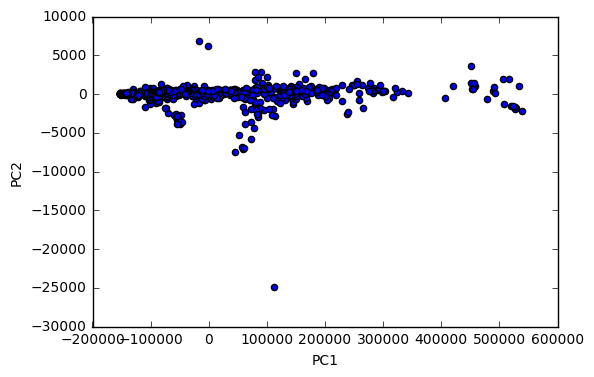

In [89]:
plt.scatter(Y.T[0], Y.T[1])
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()